# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import cv2
from sklearn.utils import shuffle
import os
import matplotlib.image as mpimg

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_directory = rdata_directory = "../data"
training_file = data_directory+"/train.p"
validation_file = data_directory+"/valid.p"
testing_file = data_directory+"/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[-3:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


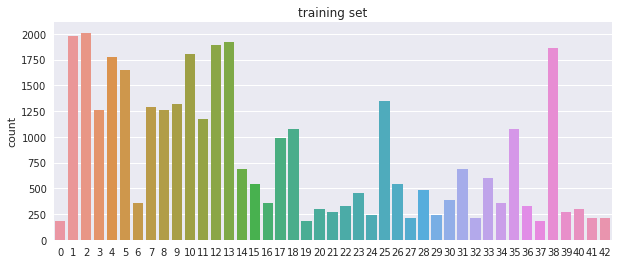

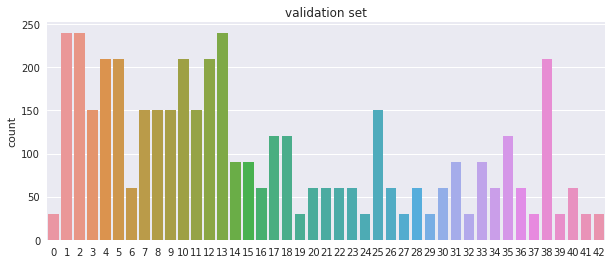

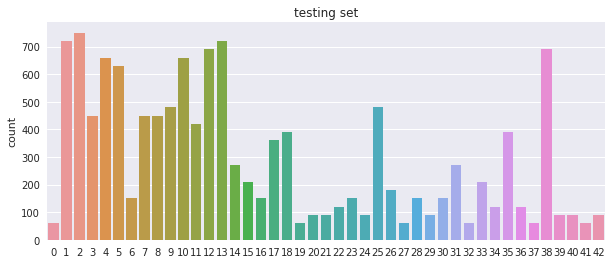

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

""" frequency plot of traffic sign class """
def class_dist_viz(label_column,data_name):
    """ 
        plot class distribution bar plot in training, validation or testing set
    
    parameters: 
            
    -------------
    
    label_column: a vector of traffic class
            
    data_name: training, validation or testing set. The string will be put as figure
                       title.
    """
    _,ax = plt.subplots(figsize=(10,4))
    ax.set_title(data_name)
    sns.countplot(x=label_column,ax=ax)
    
class_dist_viz(y_train,"training set")
class_dist_viz(y_valid,"validation set")
class_dist_viz(y_test,"testing set")

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


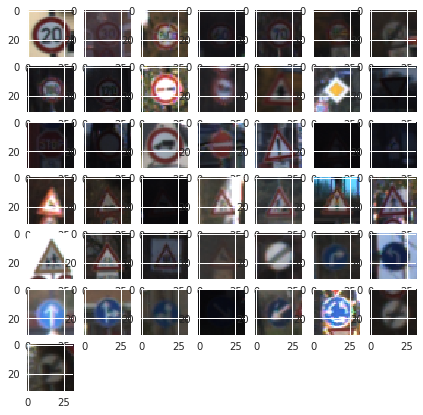

In [5]:
""" plot an image for each traffic sign class """

def find_ind(label_column):
    """ return the index of first matched item for each sign class
        
    parameters
    
    ----------
    label_column: an array of traffic class
    
    """
    unique_label = np.unique(label_column)
    label_list = list(label_column)
    return [label_list.index(x) for i,x in enumerate(unique_label)]


def plot_img(img,nrow,ncol):
    """
        plot image in a n(row)*n(column) matrix
    
    parameters:
        
    ----------
    img: a single image (array of pixels)
    
    """
    plt.subplot(nrow,ncol,i+1)
    plt.imshow(img)

class_ind = find_ind(y_train) # index for each class

fig = plt.figure(figsize=(7,7))
num_class = len(class_ind)
for i in range(num_class): # 
    plot_img(X_train[class_ind[i],:,:,:],7,7)
plt.show()



From the plot above, we can see some images are not bright enough. It might potentially cause problem for
the model to recognize them correctly.


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

I normalize the image by dividing each pixel/feature by the its maximum value. I choose this normalization because it doesn't modify the original traffic sign for human eyes in visualization whereas (pixel-128)/128 modifies the sign.

In [7]:
def max_norm(x):
    """
        normalize image data by deviding the maximum value of each pixel
    
    parameters:
        
    ------------
    x: image array of shape: sample_size, length, width, color_channel
    
    """
    x_flat = np.copy(x)
    feature_len = x.shape[1]*x.shape[2]*x.shape[3] # length of flattened image
    x_flat = np.reshape(x_flat,(x.shape[0],feature_len)) # reshape
    x_max = np.amax(x_flat,axis=0) # column max
    x_flat = x_flat/x_max # normalize
    x_norm = np.reshape(x_flat,x.shape)

    return x_norm


X_train = max_norm(X_train)
X_valid = max_norm(X_valid)
X_test = max_norm(X_test)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


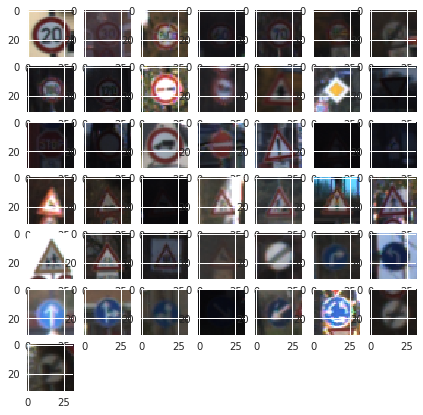

43


In [8]:
fig = plt.figure(figsize=(7,7))
num_class = len(class_ind)
for i in range(num_class): # 
    plot_img(X_train[class_ind[i],:,:,:],7,7)
plt.show()
print(num_class)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [10]:
def conv_net(x):
    """
        define a convoluation network for traffic sign classifier
        
    parameters:
    
    -------------
    x: image array 
    
    """
    
    # define parameters for weights initialization
    mu = 0
    sigma = 0.1
    
    # =================================================
    # Layer 1:convolution layer + activation + pooling
    # =================================================
    
    # first convoluation layer: input size = 32*32*3, output size = 28*28*6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean=mu,stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding="VALID") + conv1_b
    
    # activation
    conv1 = tf.nn.relu(conv1)
    
    # pooling layer input_size = 28*28*6 output_size = 14*14*6
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    
    # ==================================================
    # Layer 2:convoluation layer + activation + pooling
    # ==================================================
    
    # second convoluation layer: input_size = 14*14*6, output_size = 10*10*16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean=mu,stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_W,strides=[1,1,1,1],padding="VALID") + conv2_b
    
    # activation 
    conv2 = tf.nn.relu(conv2)
    
    # pooling layer: input_size = 10*10*16 output_size = 5*5*16
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding="VALID")
    
    # ===============================================================
    # Flatten Layer. input_size = 5*5*16 + 14*14*6 output_size = 1576
    # ================================================================
    fc0_high = tf.contrib.layers.flatten(conv2) # flattern high-level feature maps
    fc0_low = tf.contrib.layers.flatten(conv1) # flattern low-level feature maps
    fc0 = tf.concat(concat_dim=1,values=[fc0_high,fc0_low])
    
    # =====================================================================
    # Layer 3: fully connectted layer: input_size = 1576, output_size = 120
    # =====================================================================
    
    # fully connected layer
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1576,120),mean=mu,stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0,fc1_W) + fc1_b
    
    # activation
    fc1 = tf.nn.relu(fc1)
    
    # =====================================================================
    # Layer 4: fully connected layer: input_size = 120, output_size = 84
    # =====================================================================
    
    # fully connected layer
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84),mean=mu,stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_W) + fc2_b
    
    # activation
    fc2 = tf.nn.relu(fc2)
    
    # ======================================================================
    # Layer 5: fully connected layer: input_size = 84, output_size = 43
    # ======================================================================
    
    # fully connected layer
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,num_class),mean=mu,stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(num_class))
    logits = tf.matmul(fc2,fc3_W) + fc3_b
    
    # define regularization loss
    l1_loss = tf.contrib.layers.l1_regularizer(scale=0.000205,scope=None)
    reg_loss = tf.contrib.layers.apply_regularization(l1_loss,[conv1_W,conv2_W,fc1_W,fc2_W,fc3_W])
    
    # ======================================================================
    # return logits for each class
    # ======================================================================
    return (logits,reg_loss)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [12]:
# ========================================================
#           Define Features and Labels
# ========================================================
x = tf.placeholder(tf.float32,(None,32,32,3)) # features (batch_size*width*height*color_channel)
y = tf.placeholder(tf.int32,(None)) # batch_size
one_hot_y = tf.one_hot(y,num_class) # one hot encoding
# ========================================================
#           Model training and evaluation
# ========================================================
    
""" Hyperparameters """
rate = 0.008 # learning rate
epoch = 150 # training epochs
batch_size = 256 # batch size


""" loss and accuracy part in computational graph """
logits,reg_loss = conv_net(x) # x is the placehoder in the graph defined above
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y,logits=logits) # a vector of cross_entropy loss

# define loss
data_loss = tf.reduce_mean(cross_entropy) # average cross-entropy
loss = data_loss+reg_loss

# optimize
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss)
correct_prediction = tf.equal(tf.argmax(one_hot_y,1),tf.argmax(logits,1)) # an array of right or wrong prediction
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # prediction accuracy
saver = tf.train.Saver() # save trained model

""" helper function to plot accuracy and loss """
def plot_accuracy(train_log,valid_log):
    """
    plot training accuracy and validation accuracy per epoch
    
    parameters:
    -------------
    train_log: an array of training accuracy. This result is obtained from training session
    
    valid_log: an array of validation accuracy. This result is obtained from training session
    """
    
    num_log = len(train_log) # number of element in input array
    
    fig = plt.figure()
    fig.suptitle("Accuracy vs. Epoch")
    ax = fig.add_subplot(111)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.plot(np.arange(0,num_log),train_log,'r-',label='train_accuracy')
    ax.plot(np.arange(0,num_log),valid_log,'b-',label='validation_accuracy')
    ax.legend(loc=4,prop={'size':15})
    
def plot_loss(train_log,valid_log):
    """
    plot training and validation loss per epoch
    
    parameters:
    -------------
    train_log: an array of training loss. This result is obtained from training session
    
    valid_log: an array of validation loss. This result is obtained from training session
    """
    
    num_log = len(train_log) # number of element in input array
    
    fig = plt.figure()
    fig.suptitle("Loss vs. Epoch")
    ax = fig.add_subplot(111)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.plot(np.arange(0,num_log),train_log,'r-',label='train_loss')
    ax.plot(np.arange(0,num_log),valid_log,'b-',label='validation_loss')
    ax.legend(loc=4,prop={'size':15})


In [13]:
# save the trained parameters for prediction
saver = tf.train.Saver()
save_dir = 'check_points/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir,'validation')

Training...
1th epoch finished
2th epoch finished
3th epoch finished
4th epoch finished
5th epoch finished
6th epoch finished
7th epoch finished
8th epoch finished
9th epoch finished
10th epoch finished
11th epoch finished
12th epoch finished
13th epoch finished
14th epoch finished
15th epoch finished
16th epoch finished
17th epoch finished
18th epoch finished
19th epoch finished
20th epoch finished
21th epoch finished
22th epoch finished
23th epoch finished
24th epoch finished
25th epoch finished
26th epoch finished
27th epoch finished
28th epoch finished
29th epoch finished
30th epoch finished
31th epoch finished
32th epoch finished
33th epoch finished
34th epoch finished
35th epoch finished
36th epoch finished
37th epoch finished
38th epoch finished
39th epoch finished
40th epoch finished
41th epoch finished
42th epoch finished
43th epoch finished
44th epoch finished
45th epoch finished
46th epoch finished
47th epoch finished
48th epoch finished
49th epoch finished
50th epoch finish

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


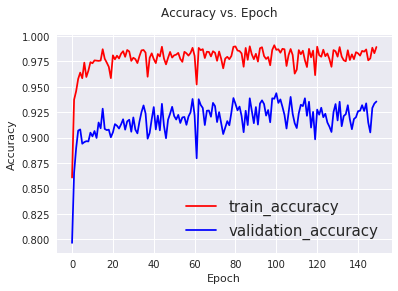

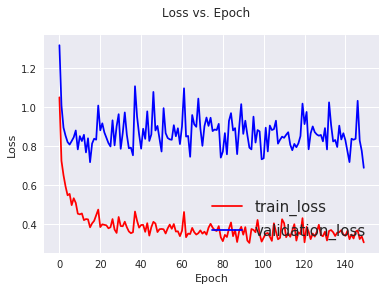

In [14]:
# ======================================================================
#                       training the model (training session)
# ======================================================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # initialize weights in the network
    num_example = len(X_train) # number of data in the training set
    train_acc,valid_acc,train_loss,valid_loss = [],[],[],[] # evaluation log
    print("Training...")
    for i in range(epoch):
        X_train,y_train = shuffle(X_train,y_train)
        for offset in range(0,num_example,batch_size):
            end = offset + batch_size # end index of each batch
            batch_X, batch_y = X_train[offset:end],y_train[offset:end]
            sess.run(training_operation,feed_dict={x:batch_X,y:batch_y}) # put batch_X in x in the graph. put batch_y in y in the graph
        """ get model performance (accuracy and loss) after every epoch """
        train_acc.append(accuracy.eval(feed_dict={x:X_train,y:y_train}))
        valid_acc.append(accuracy.eval(feed_dict={x:X_valid,y:y_valid}))
        train_loss.append(loss.eval(feed_dict={x:X_train,y:y_train}))
        valid_loss.append(loss.eval(feed_dict={x:X_valid,y:y_valid}))
        print (str(i+1)+"th epoch finished")
        
    saver.save(sess,save_path=save_path)
    
plot_accuracy(train_acc,valid_acc) # plot accuracy
plot_loss(train_loss, valid_loss) # plot loss

In [14]:
# Restore saved trained parameters and make prediction
with tf.Session() as sess:
    saver.restore(sess=sess, save_path=save_path)
    print("training accuracy is",accuracy.eval(feed_dict={x:X_train,y:y_train}))
    print("validation accuracy is",accuracy.eval(feed_dict={x:X_valid,y:y_valid}))
    print("testing accuracy is",accuracy.eval(feed_dict={x:X_test,y:y_test}))

training accuracy is 0.989194
validation accuracy is 0.935601
testing accuracy is 0.928821


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
### Load the images and plot them here.
path = "../data/"

def process_img(filename,new_shape):
    """ 
        - read in an image from ppm format
        - resize it to 32*32
        - return resized image
    """
    # @param new_shape: a triple
    fullfilename = path+filename
    img = mpimg.imread(fullfilename)
    img = cv2.resize(img,new_shape)
    return img


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


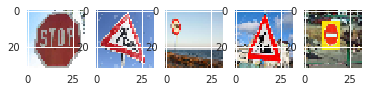

In [16]:
"""process/resize image"""
test_img = np.empty([5,32,32,3],dtype=np.int32) # create an empty 4d array
for i in range(len(test_img)):
    test_img[i] = process_img(str(i+1)+".jpg",(32,32))

"""plot test image"""
for i in range(len(test_img)): # 
    plot_img(test_img[i,:,:,:],1,5)
plt.show()


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


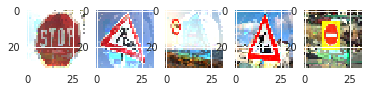

In [17]:
### normalized image

"""normalize image"""
test_img = max_norm(test_img)

"""plot normalized test image"""
for i in range(len(test_img)): # 
    plot_img(test_img[i,:,:,:],1,5)
plt.show()

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess=sess, save_path=save_path)
    score = sess.run([logits],feed_dict={x:test_img})

In [19]:
score = np.array(score).reshape([5,43])
prediction = np.argmax(score,axis=1)
print("prediction is",prediction)

prediction is [ 3 23 32 23 23]


Based on the prediction and the signname.csv file, the predictions are

img-1: speed limit (60km/h)

img-2: slippery road

img-3: End of all speed and passing limits

img-4: slippery road

img-5: slippery road

### Analyze Performance

In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

The accuracy on these new images are 0. I think this is because these new images are from difference sources than the German Traffic Sign dataset, which makes recognition much more difficult.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [22]:
with tf.Session() as sess:
    saver.restore(sess=sess, save_path=save_path)
    predict_three= sess.run(tf.nn.top_k(tf.nn.softmax(logits),5),feed_dict={x:test_img})

In [23]:
softmax_prob = predict_three.values# top three probability and sign
top_three = predict_three.indices
print("softmax prediction is \n",np.round(softmax_prob,2))
print("traffic sign is \n",top_three)

softmax prediction is 
 [[ 0.22        0.20999999  0.16        0.1         0.08      ]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.97000003  0.01        0.01        0.          0.        ]
 [ 0.74000001  0.25        0.          0.          0.        ]
 [ 0.97000003  0.02        0.01        0.          0.        ]]
traffic sign is 
 [[ 3 22 14 20 13]
 [23 18 37  1  2]
 [32  1 41  6 40]
 [23 25 11 31 20]
 [23 25 11 19 38]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")